In [1]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, median_absolute_error , r2_score

In [2]:
np.random.seed(33)
number_of_points=100
coefficient, intercept=3, 4
X=np.random.rand(number_of_points)*10
Noise=np.random.rand(number_of_points)*3
Y=coefficient*X + intercept + Noise

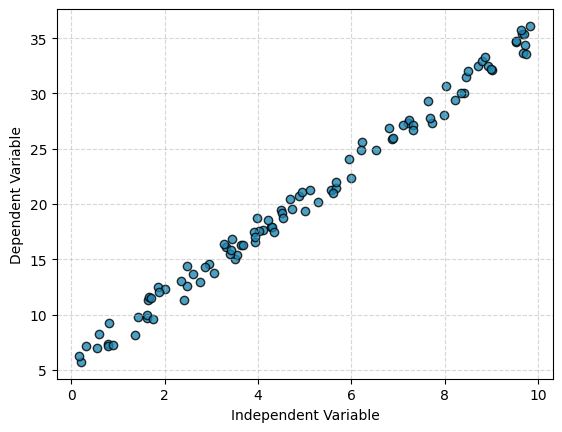

In [3]:
plt.scatter(X,Y, color='#1f88b4', alpha=0.8, edgecolor='k')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.show()

In [4]:
learning_rate = 0.001
number_of_iterations = 1500
coeff, interc = 0, 1
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.2, random_state=33)
n=len(X_train)

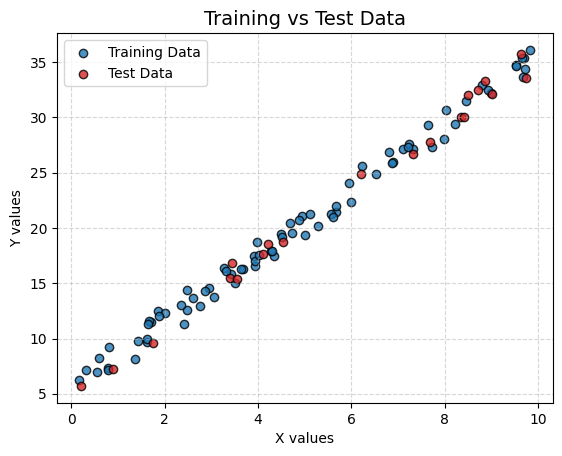

In [5]:
plt.scatter(X_train, y_train, color='#1f77b4', alpha=0.8, edgecolor='k', label='Training Data')
plt.scatter(X_test, y_test, color='#d62728', alpha=0.8, edgecolor='k', label='Test Data')
plt.title('Training vs Test Data', fontsize=14)
plt.xlabel('X values')
plt.ylabel('Y values')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [6]:
errors=[]
for k in range(number_of_iterations):
    Y_hate = coeff * X_train + interc  
    error = Y_hate - y_train           
    errors.append(np.mean(error ** 2))  

    dcoeff = -(2/n) * np.sum(X_train * (y_train - Y_hate))
    dinterc = -(2/n) * np.sum(y_train - Y_hate)
    
    coeff = coeff - learning_rate * dcoeff
    interc = interc - learning_rate * dinterc

    print(f'Iteration: {k} --- Coeff: {coeff} --- Interc: {interc} --- Error (MSE): {errors[-1]}')

Y_hate = coeff * X_train + interc
print(f'Predicetd values : \n {Y_hate}')
print(f'\n--------------------\n')
print(f'Coeff : {coeff} --- interc: {interc}')
print(f'\n--------------------\n')
print(f'Error : \n {np.array(errors)}')


Iteration: 0 --- Coeff: 0.22485677606546461 --- Interc: 1.0377006638718953 --- Error (MSE): 423.94402753490886
Iteration: 1 --- Coeff: 0.4357575654775579 --- Interc: 1.0731846398486018 --- Error (MSE): 373.57295212144027
Iteration: 2 --- Coeff: 0.6335673884600618 --- Interc: 1.1065892626455058 --- Error (MSE): 329.252036031904
Iteration: 3 --- Coeff: 0.8190976501092788 --- Interc: 1.138043354815265 --- Error (MSE): 290.254528436078
Iteration: 4 --- Coeff: 0.9931094635321212 --- Interc: 1.1676677543431493 --- Error (MSE): 255.94097655134343
Iteration: 5 --- Coeff: 1.156316767011607 --- Interc: 1.1955758095413072 --- Error (MSE): 225.74873931251955
Iteration: 6 --- Coeff: 1.3093892479662266 --- Interc: 1.2218738432688183 --- Error (MSE): 199.18276067033094
Iteration: 7 --- Coeff: 1.4529550856783529 --- Interc: 1.246661588378759 --- Error (MSE): 175.80745121063626
Iteration: 8 --- Coeff: 1.5876035240246373 --- Interc: 1.2700325961756693 --- Error (MSE): 155.23954496180323
Iteration: 9 ---

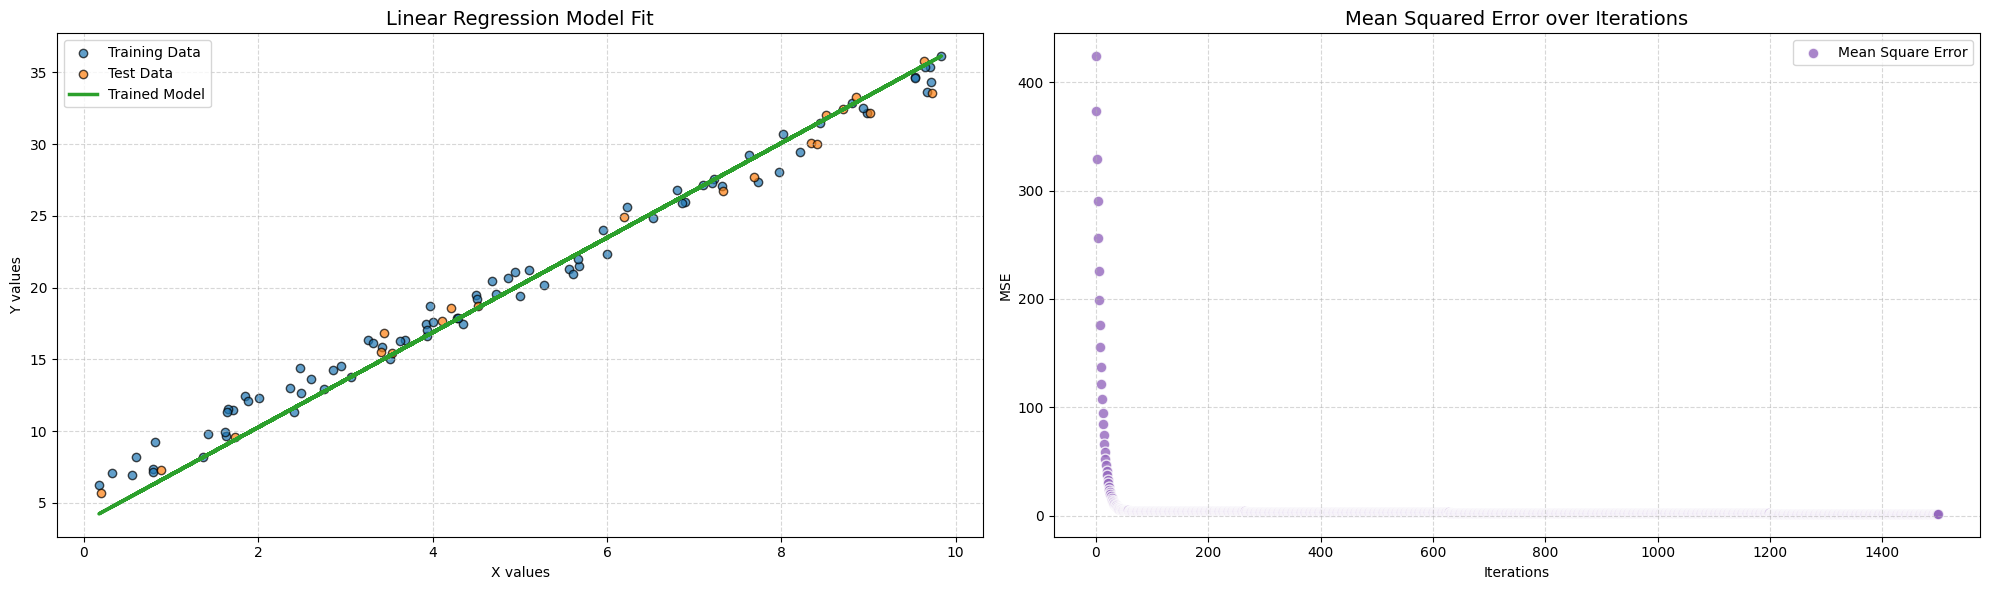

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(20, 6))
# Left Plot: Model Fit
axs[0].scatter(X_train, y_train, color='#1f77b4', label='Training Data', alpha=0.7, edgecolor='k')
axs[0].scatter(X_test, y_test, color='#ff7f0e', label='Test Data', alpha=0.7, edgecolor='k')
axs[0].plot(X_train, Y_hate, color='#2ca02c', linewidth=2.5, label='Trained Model')
axs[0].set_title('Linear Regression Model Fit', fontsize=14)
axs[0].set_xlabel('X values')
axs[0].set_ylabel('Y values')
axs[0].legend()
axs[0].grid(True, linestyle='--', alpha=0.5)

# Right Plot: Mean Squared Error (MSE)
axs[1].scatter(np.arange(number_of_iterations), errors, 
               color='#9467bd', label='Mean Square Error', alpha=0.8, edgecolor='white', s=60)
axs[1].set_title('Mean Squared Error over Iterations', fontsize=14)
axs[1].set_xlabel('Iterations')
axs[1].set_ylabel('MSE')
axs[1].legend()
axs[1].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()




In [8]:
Y_hate=coeff*X_test+interc
MSE = (1 / n) * np.sum((Y_hate - y_test)**2)
MAE = (1 / n) * np.sum(np.abs(Y_hate - y_test))
SS_res = np.sum((y_test - Y_hate) ** 2)  
SS_tot = np.sum((y_test - np.mean(y_test)) ** 2)
R2 = 1 - (SS_res / SS_tot)
print(f'Mean Square Error: {MSE}')
print(f'Mean Absolute Error : {MAE}')
print(f"R²: {R2}")


Mean Square Error: 0.26065302707996
Mean Absolute Error : 0.20614304323620122
R²: 0.9878624167170442


In [9]:
model=LinearRegression()
model.fit(X_train.reshape(-1, 1),y_train.reshape(-1, 1))
bias=model.intercept_
W=model.coef_
y_hate=model.predict(X_test.reshape(-1, 1))

mse=mean_squared_error(y_test.reshape(-1, 1),y_hate.reshape(-1, 1))
mae=median_absolute_error(y_test.reshape(-1, 1),y_hate.reshape(-1, 1))
r2= r2_score(y_test.reshape(-1, 1),y_hate.reshape(-1, 1))

print(f'Coeffi {W} , Intercept {bias}')
print(f'Mean Square Error: {mse}')
print(f'Mean Absolute Error : {mae}')
print(f"R²: {r2}")

Coeffi [[2.99781351]] , Intercept [5.57640628]
Mean Square Error: 0.668096597771157
Mean Absolute Error : 0.7781835570905358
R²: 0.9922223442143076


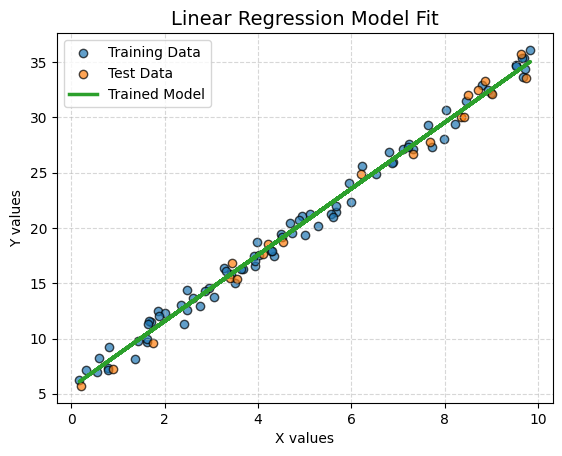

In [10]:
plt.scatter(X_train, y_train, color='#1f77b4', label='Training Data', alpha=0.7, edgecolor='k')
plt.scatter(X_test, y_test, color='#ff7f0e', label='Test Data', alpha=0.7, edgecolor='k')
y_hate=model.predict(X_train.reshape(-1, 1))
plt.plot(X_train, y_hate, color='#2ca02c', linewidth=2.5, label='Trained Model')
plt.title('Linear Regression Model Fit', fontsize=14)
plt.xlabel('X values')
plt.ylabel('Y values')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)